In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS")
import matplotlib.colors as mcolors

path = '/media/miguel/Elements/zdc_data/'

#gamma_file = path+"zdc_gamma_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_14/zdc_reco_gamma_discrete_10GeV-300GeV_theta_0deg-0.5deg_921859_7.edm4hep.root"
#pi0_file = path+"zdc_pi0_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_12/zdc_reco_pi0_discrete_10GeV-300GeV_theta_0deg-0.5deg_921269_43.edm4hep.root"

#pi0_file = path+"zdc_pi0_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_23/zdc_reco_pi0_log10continuous_10GeV-300GeV_theta_0deg-0.5deg_920868_98.edm4hep.root"
#gamma_file = path+"/zdc_reco_gamma_log10continuous_10GeV-300GeV_theta_0deg-0.5deg_921725_93.edm4hep.root"

#gamma_events = ur.open("%s:events"%(gamma_file))
#gamma_arrays = gamma_events.arrays()

#pi0_events = ur.open("%s:events"%(pi0_file))
#pi0_arrays = pi0_events.arrays()




import time



/tmp/ipykernel_1691132/2276651102.py:8: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


In [2]:
start_time = time.time()
gamma_path = path + "zdc_gamma_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_14/"
gamma_arrays = ur.concatenate([gamma_path+"/*.root:events"])
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


Elapsed Time: 340.2773506641388 seconds


In [3]:
start_time = time.time()
pi0_path = path + "zdc_pi0_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_23/"
pi0_arrays = ur.concatenate([pi0_path+"/*.root:events"])
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")

Elapsed Time: 175.77027773857117 seconds


In [4]:

def return_STD(x,y,z,E):

    mask = E>0.3/1000.0
    x = x[mask]
    y= y[mask]
    z = z[mask]
    E = E[mask]
    print(E)
    print(ak.sum(E,axis=-1))
    weights = E/ak.sum(E,axis=-1)
    #w0=
    #weights = ak.where(np.log(E/ak.sum(E,axis=-1))>-w0, w0+np.log(E/ak.sum(E,axis=-1)), 0)
    print(len(weights))
    sum_weights = ak.sum(weights, axis=-1)
    COG_X = ak.sum(x * weights, axis=-1)
    COG_X = ak.where(sum_weights != 0, COG_X/ sum_weights, 0)
    COG_Y = ak.sum(y * weights, axis=-1)
    COG_Y = ak.where(sum_weights != 0, COG_Y/ sum_weights, 0)
    COG_Z = ak.sum(z * weights, axis=-1)
    COG_Z = ak.where(sum_weights != 0, COG_Z/ sum_weights, 0)

    COG_XY = ak.sum(x*y*weights, axis=-1)
    COG_XY = ak.where(sum_weights != 0, COG_XY/ sum_weights, 0)

    COG_XZ = ak.sum(x*z*weights, axis=-1)
    COG_XZ = ak.where(sum_weights != 0, COG_XZ/ sum_weights, 0)
    xsq= x**2
    ysq= y**2
    zsq= z**2

    COG_Xsq = ak.sum(weights*xsq, axis=-1)
    COG_Xsq = ak.where(sum_weights != 0, COG_Xsq / sum_weights, 0)
    COG_Ysq = ak.sum( weights*ysq, axis=-1)
    COG_Ysq = ak.where(sum_weights != 0, COG_Ysq / sum_weights, 0)
    COG_Zsq = ak.sum( weights*zsq, axis=-1)
    COG_Zsq = ak.where(sum_weights != 0, COG_Zsq / sum_weights, 0)


    sigma_X = COG_Xsq-COG_X**2
    sigma_Y = COG_Ysq-COG_Y**2
    sigma_Z = COG_Zsq-COG_Z**2
    sigma_XY = COG_XY-COG_X*COG_Y
    sigma_XZ = COG_XZ-COG_X*COG_Z
    d = sigma_Y - sigma_X
    s = np.sqrt(d**2 + 4*sigma_XY**2)
    sigma_1 = np.sqrt(sigma_X + sigma_Y + s)/np.sqrt(2)
    sigma_2 = np.sqrt(sigma_X + sigma_Y - s)/np.sqrt(2)

    SF=1.919/100
    cluster_E = ak.sum(E,axis=-1)/SF

    nhit = ak.count(E,axis=-1)
    print('nhits' , nhit)
    return sigma_1/10.0, sigma_2/10.0, np.sqrt(sigma_Z)/10.0, sigma_XZ/100, cluster_E, nhit

In [5]:
sigma_1 = {}
sigma_2 = {}
sigma_z = {}
sigma_xz = {}
cluster_E = {} 
nhits= {}
x, y, z, E = gamma_arrays['ZDCHcalHitsReco.local.x'] ,gamma_arrays['ZDCHcalHitsReco.local.y'] ,gamma_arrays['ZDCHcalHitsReco.local.z'], gamma_arrays['ZDCHcalHitsReco.energy']
sigma_1['photon'], sigma_2['photon'], sigma_z['photon'], sigma_xz['photon'], cluster_E['photon'], nhits['photon']= return_STD(x,y,z,E)

x, y, z, E  = pi0_arrays['ZDCHcalHitsReco.local.x'] ,pi0_arrays['ZDCHcalHitsReco.local.y'] ,pi0_arrays['ZDCHcalHitsReco.local.z'], pi0_arrays['ZDCHcalHitsReco.energy']
sigma_1['pi0'], sigma_2['pi0'], sigma_z['pi0'], sigma_xz['pi0']  , cluster_E['pi0'], nhits['pi0'] = return_STD(x,y,z,E)


[[0.00793, 0.0339, 0.0605, 0.0841, ..., 0.000464, 0.00118, 0.000684], ...]
[0.555, 0.704, 1.93, 1.57, 0.959, 2.16, ..., 3.77, 0.626, 0.345, 0.502, 2.91]
1584100


/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in sqrt
  result = impl(*args, **kwargs)


nhits [67, 71, 161, 124, 93, 162, 144, 68, ..., 252, 48, 136, 285, 73, 53, 75, 211]
[[0.00433, 0.0172, 0.0428, 0.0488, ..., 0.00183, 0.00361, 0.000604], ..., [...]]
[0.356, 1.94, 1.96, 0.148, 0.298, 0.14, ..., 0, 1.34, 3.21, 1.95, 1.47, 0.607]
1372000
nhits [59, 159, 105, 34, 43, 55, 94, 250, 0, ..., 143, 188, 0, 156, 191, 183, 180, 67]


In [6]:
def get_true(arrays):
    print(arrays['MCParticles.generatorStatus'])
    pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,2])
    py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,2])
    px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,2])
    mass = ak.to_numpy(arrays['MCParticles.mass'][:,2])
    print(mass)
    p = np.sqrt(px*px + py*py+ pz*pz)
    gen_E = np.sqrt(p*p + mass*mass)-mass
    theta=np.arccos(pz/p)*1000  ## in mili radians
    return gen_E, theta

In [7]:
true_E= {}
true_theta = {} 
true_E['photon'], true_theta['photon'] = get_true(gamma_arrays)
true_E['pi0'],    true_theta['pi0']       = get_true(pi0_arrays)

cluster_Enorm = {}

cluster_Enorm['photon'] = cluster_E['photon']/true_E['photon']
cluster_Enorm['pi0'] = cluster_E['pi0']/true_E['pi0']



[[4, 4, 1], [4, 4, 1], [4, 4, 1], [...], ..., [4, 4, 1], [4, 4, 1], [4, 4, 1]]
[-3.37174788e-07 -4.76837158e-07 -1.34869915e-06 ...  2.38418579e-07
 -3.37174788e-07  2.69739830e-06]
[[4, 4, 1, 0, 0], [4, 4, 1, 0, 0], [...], ..., [4, 4, 1, 0, 0], [4, 4, 1, 0, 0]]
[0.134977 0.134977 0.134977 ... 0.134977 0.134977 0.134977]


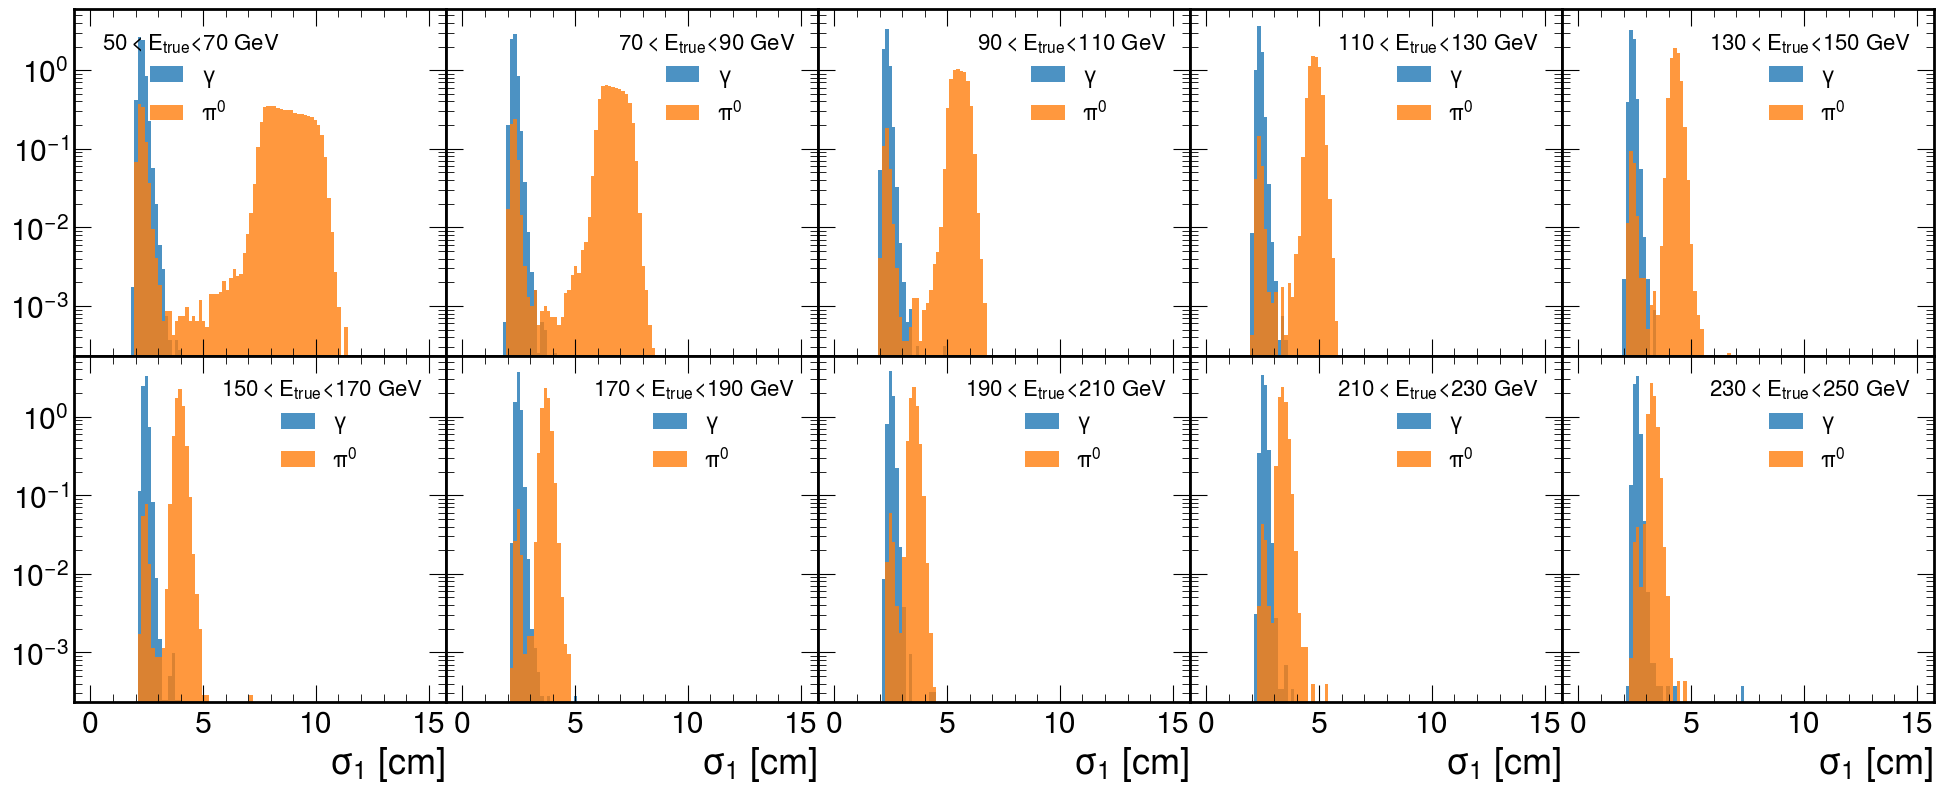

In [27]:

fig, ax = plt.subplots(2,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,10):
    mine = i*20     + 50
    maxe= (i+1)*20   +50
    mask1 = true_E['photon']>mine
    mask2 = true_E['photon']<maxe
    mask3 = true_theta['photon']<4
    mask = mask1 & mask2 & mask3
    myrange=(0,15)

    nphoton= len(true_E['photon'][mask])
    ax[i].hist(sigma_1['photon'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\gamma$')

    #print(np.mean(sigma_1['photon'][mask]))
    #print(np.std(sigma_1['photon'][mask]))

   #print('number of photons passing sigma_1 cut', len(sigma_1['photon'][mask]<1.8)/len(sigma_1['photon'][mask]))
    

    
    
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask = mask1 & mask2 & mask3
    ax[i].hist(sigma_1['pi0'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\pi^{0}$')
    #ax[i].set_yscale('log')
    #ax[i].set_title(r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),fontsize=18)
    ax[i].set_xlabel('$\sigma_{1}$ [cm]')
    ax[i].legend(title=r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),loc='best',title_fontsize='16',fontsize=16)
    ax[i].set_yscale('log')

    #print('number of ppi0 passing sigma_1 cut', len(sigma_1['pi0'][mask]<1.8)/len(sigma_1['pi0'][mask]))

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()



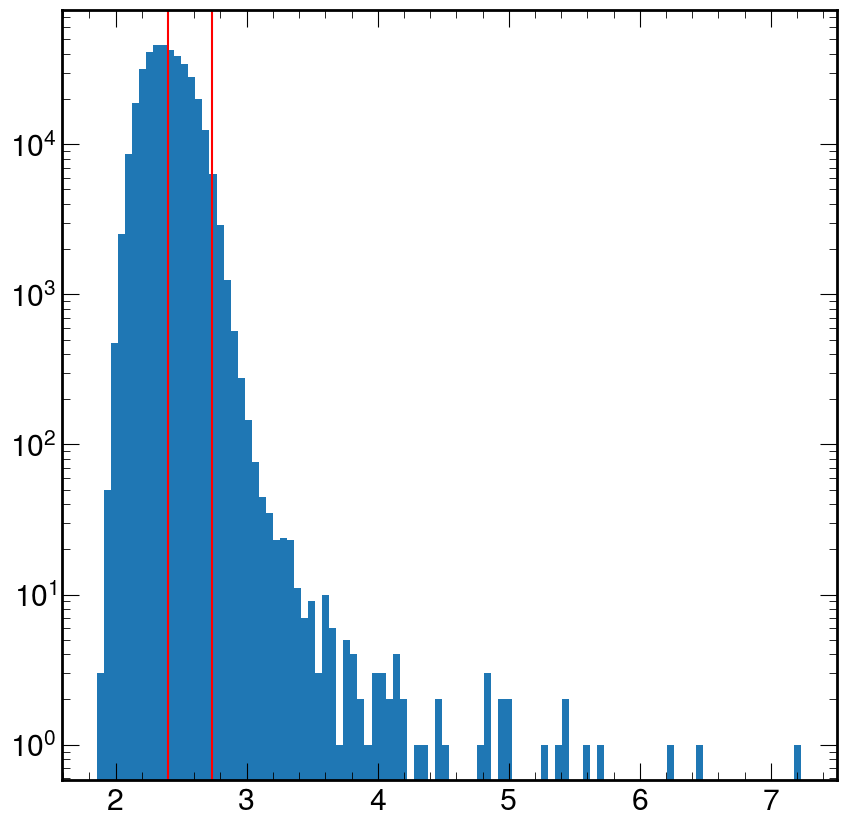

In [9]:

mask1 = true_E['photon']>50
mask2 = true_E['photon']<300
mask3 = true_theta['photon']<4
mask = mask1 & mask2 & mask3

plt.hist(sigma_1['photon'][mask],bins=100)
plt.axvline(x=np.mean(sigma_1['photon'][mask]),color='red')


sigma_cut = np.mean(sigma_1['photon'][mask])+2.0*np.std(sigma_1['photon'][mask])
plt.axvline(x=sigma_cut,color='red')

plt.yscale('log')

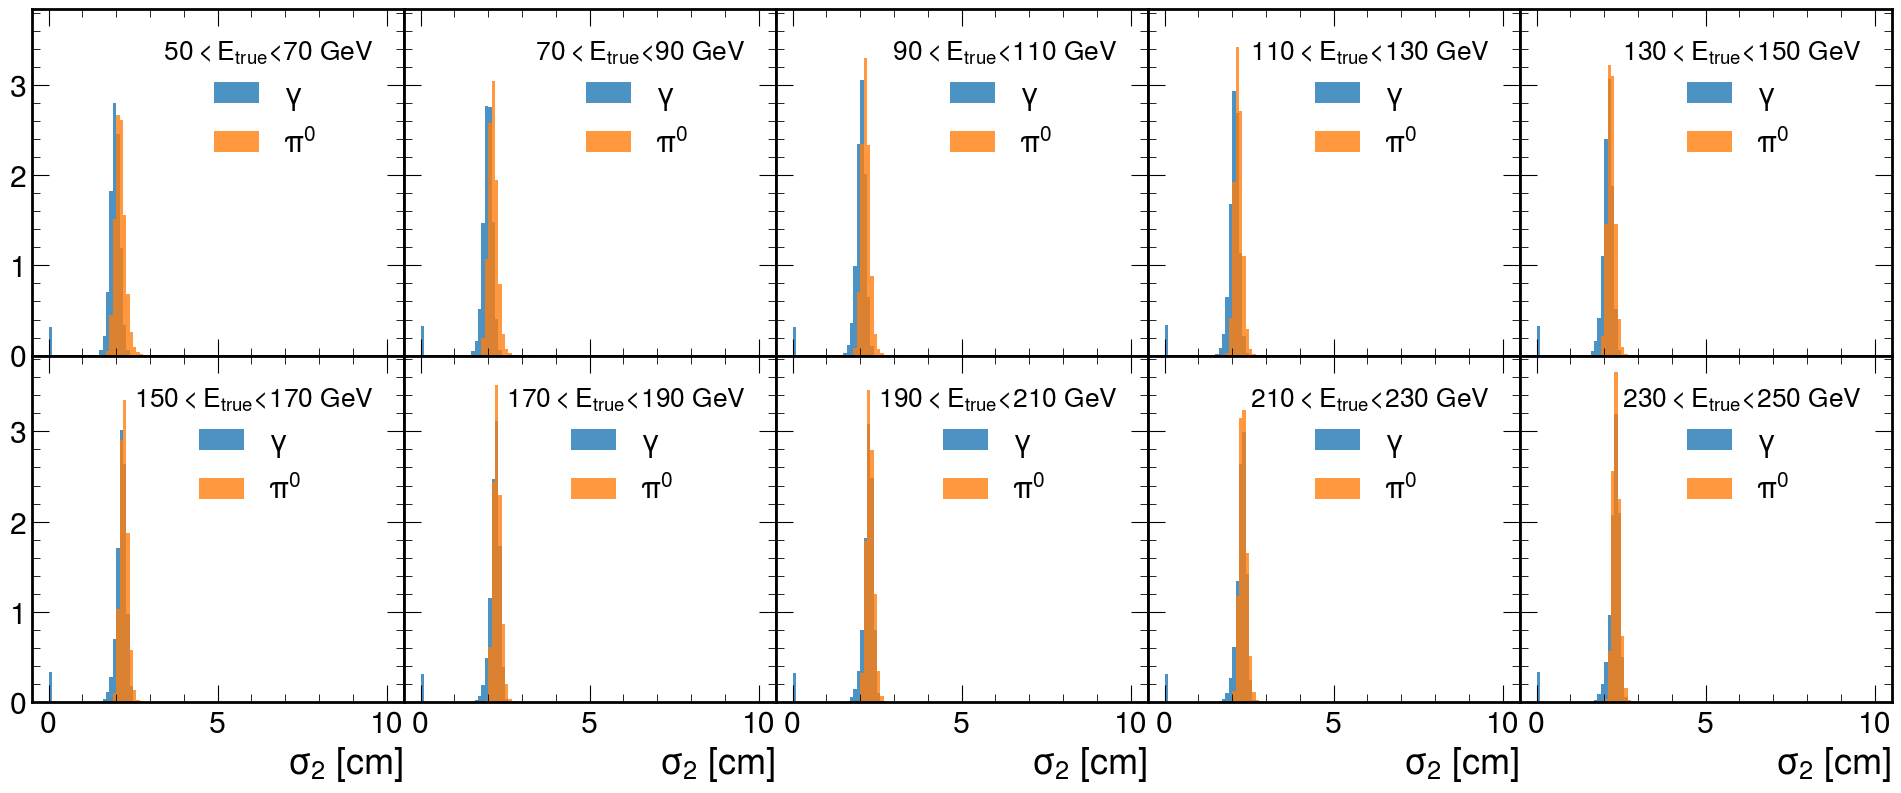

In [10]:

fig, ax = plt.subplots(2,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,10):
    mine = i*20     + 50
    maxe= (i+1)*20   +50
    mask1 = true_E['photon']>mine
    mask2 = true_E['photon']<maxe
    mask3 = true_theta['photon']<4
    mask = mask1 & mask2 #& mask3
    myrange=(0,10)
    ax[i].hist(sigma_2['photon'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\gamma$')
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask = mask1 & mask2 & mask3
    ax[i].hist(sigma_2['pi0'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\pi^{0}$')
    #ax[i].set_yscale('log')
    #ax[i].set_title(r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),fontsize=18)
    ax[i].set_xlabel('$\sigma_{2}$ [cm]')
    ax[i].legend(title=r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),loc='upper right',title_fontsize='19')
    #ax[i].set_yscale('log')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

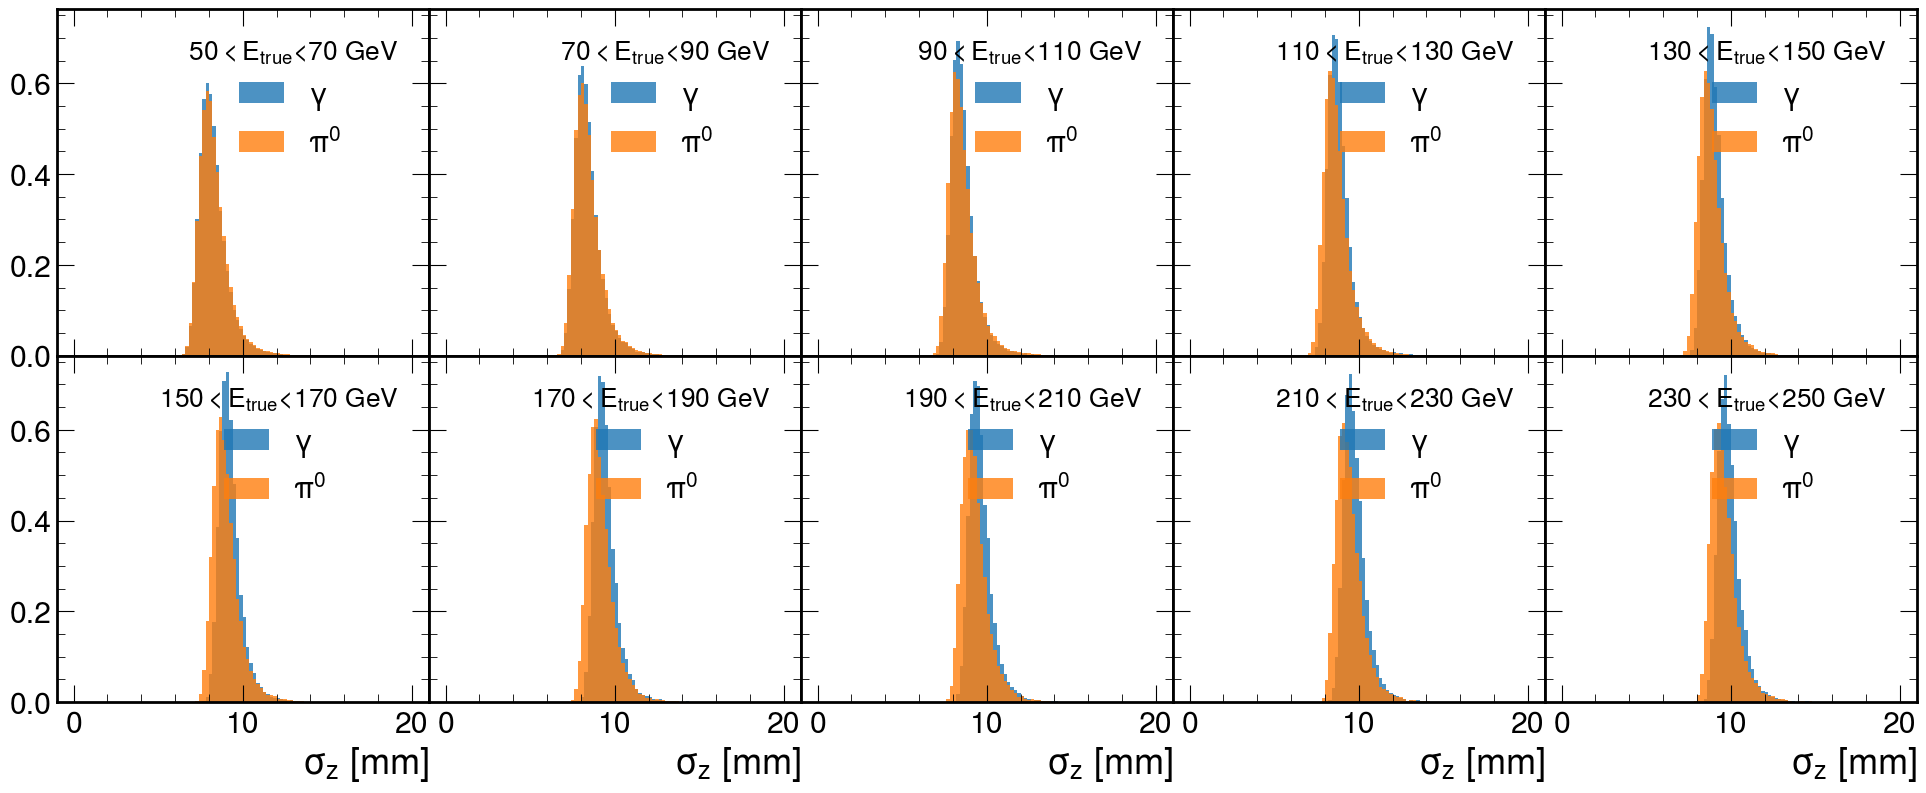

In [11]:

fig, ax = plt.subplots(2,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,10):
    mine = i*20     + 50
    maxe= (i+1)*20   +50
    mask1 = true_E['photon']>mine
    mask2 = true_E['photon']<maxe
    mask3 = true_theta['photon']<4
    mask = mask1 & mask2 & mask3
    myrange=(0,20)
    ax[i].hist(sigma_z['photon'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\gamma$')
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask = mask1 & mask2 & mask3
    ax[i].hist(sigma_z['pi0'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\pi^{0}$')
    #ax[i].set_yscale('log')
    #ax[i].set_title(r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),fontsize=18)
    ax[i].set_xlabel('$\sigma_{z}$ [mm]')
    ax[i].legend(title=r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),loc='upper right',title_fontsize='19')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

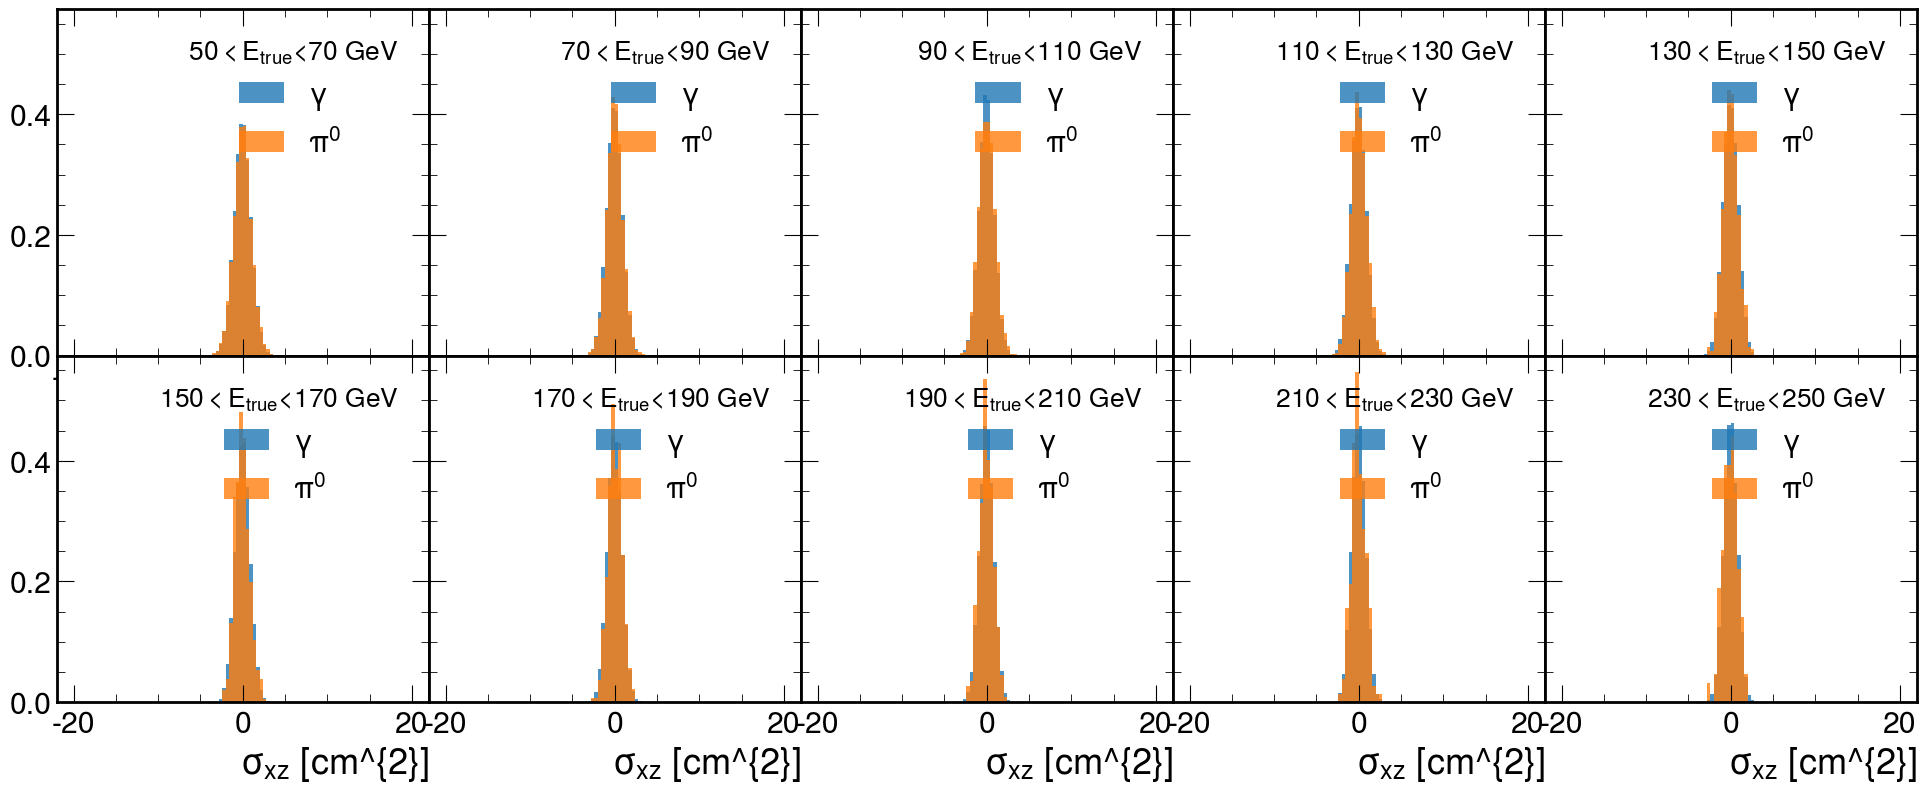

In [12]:
fig, ax = plt.subplots(2,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,10):
    mine = i*20     + 50
    maxe= (i+1)*20   +50
    mask1 = true_E['photon']>mine
    mask2 = true_E['photon']<maxe
    mask3 = true_theta['photon']<4
    mask4=  sigma_1['photon'] < sigma_cut
    mask = mask1 & mask2 & mask3 & mask4
    myrange=(-20,20)
    ax[i].hist(sigma_xz['photon'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\gamma$')
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask4=  sigma_1['pi0'] < sigma_cut

    mask = mask1 & mask2 & mask3 & mask4
    ax[i].hist(sigma_xz['pi0'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\pi^{0}$')
    #ax[i].set_yscale('log')
    #ax[i].set_title(r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),fontsize=18)
    ax[i].set_xlabel('$\sigma_{xz}$ [cm^{2}]')
    ax[i].legend(title=r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),loc='best',title_fontsize='19')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

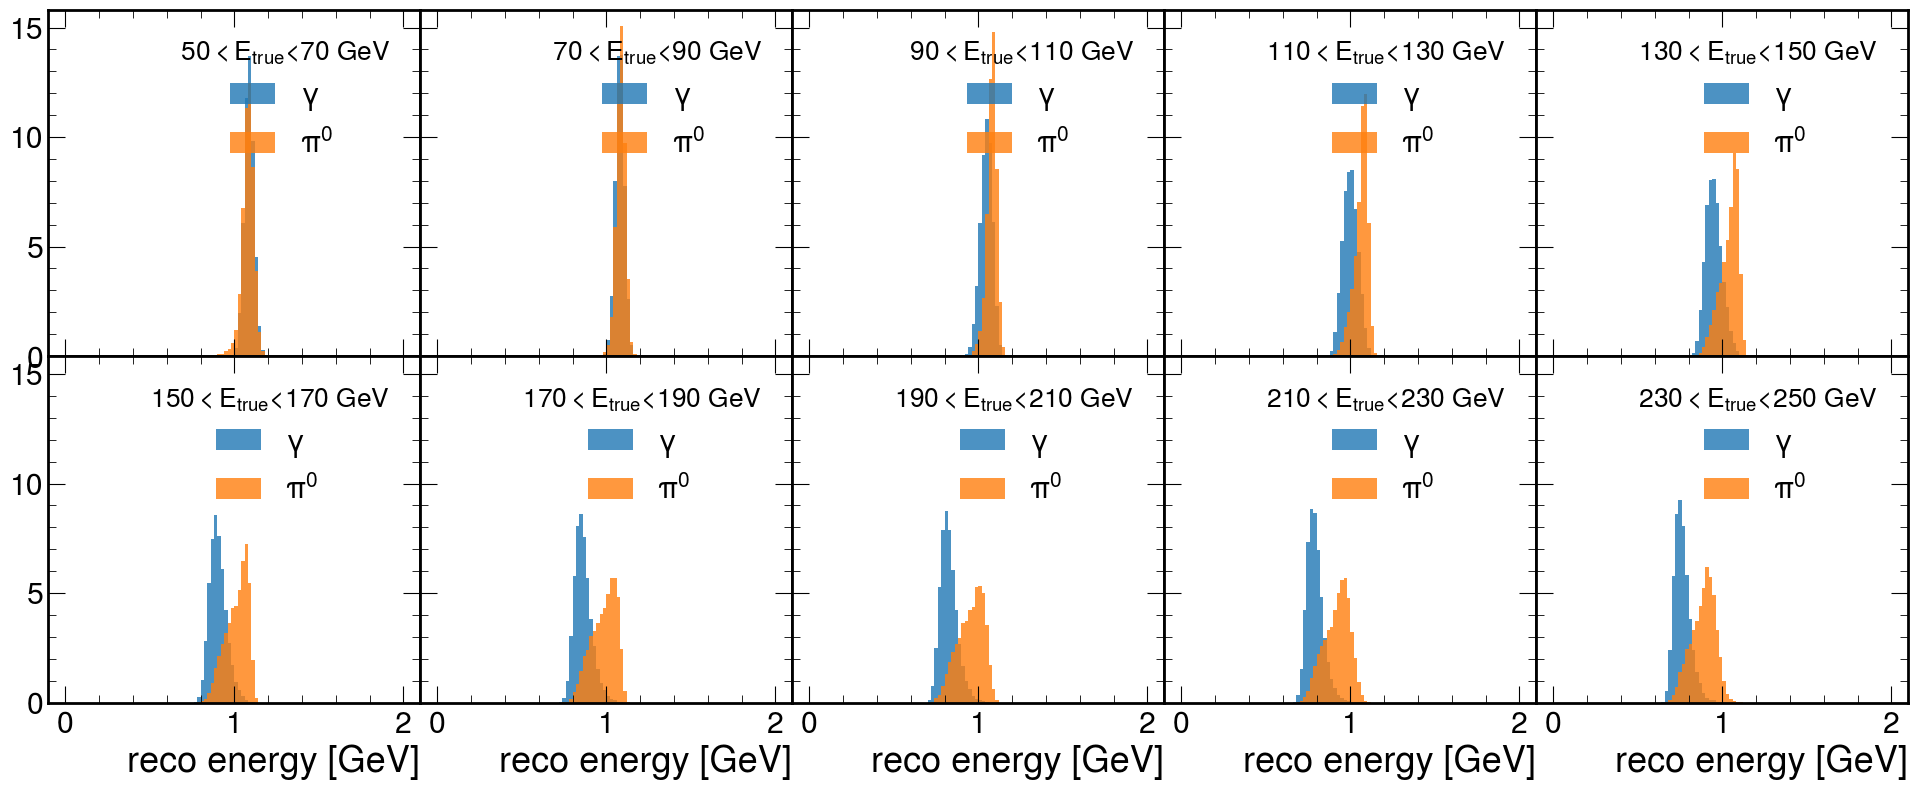

In [13]:
fig, ax = plt.subplots(2,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,10):
    mine = i*20     + 50
    maxe= (i+1)*20   +50
    mask1 = true_E['photon']>mine
    mask2 = true_E['photon']<maxe
    mask3 = true_theta['photon']<4
    mask4=  sigma_1['photon'] < sigma_cut
    mask = mask1 & mask2 & mask3 
    myrange=(0,2)
    ax[i].hist(cluster_Enorm['photon'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\gamma$')
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask4=  sigma_1['pi0'] < sigma_cut

    mask = mask1 & mask2 & mask3 
    ax[i].hist(cluster_Enorm['pi0'][mask],bins=100,range=myrange,density=True,alpha=0.8,label='$\pi^{0}$')
    #ax[i].set_yscale('log')
    #ax[i].set_title(r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),fontsize=18)
    ax[i].set_xlabel('reco energy [GeV]')
    ax[i].legend(title=r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe),loc='best',title_fontsize='19')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

 50$<E_{true}$<90 GeV
Percentage passing cut 11.7
 90$<E_{true}$<130 GeV
Percentage passing cut 4.7
 130$<E_{true}$<170 GeV
Percentage passing cut 2.5
 170$<E_{true}$<210 GeV
Percentage passing cut 1.6
 210$<E_{true}$<250 GeV
Percentage passing cut 1.1


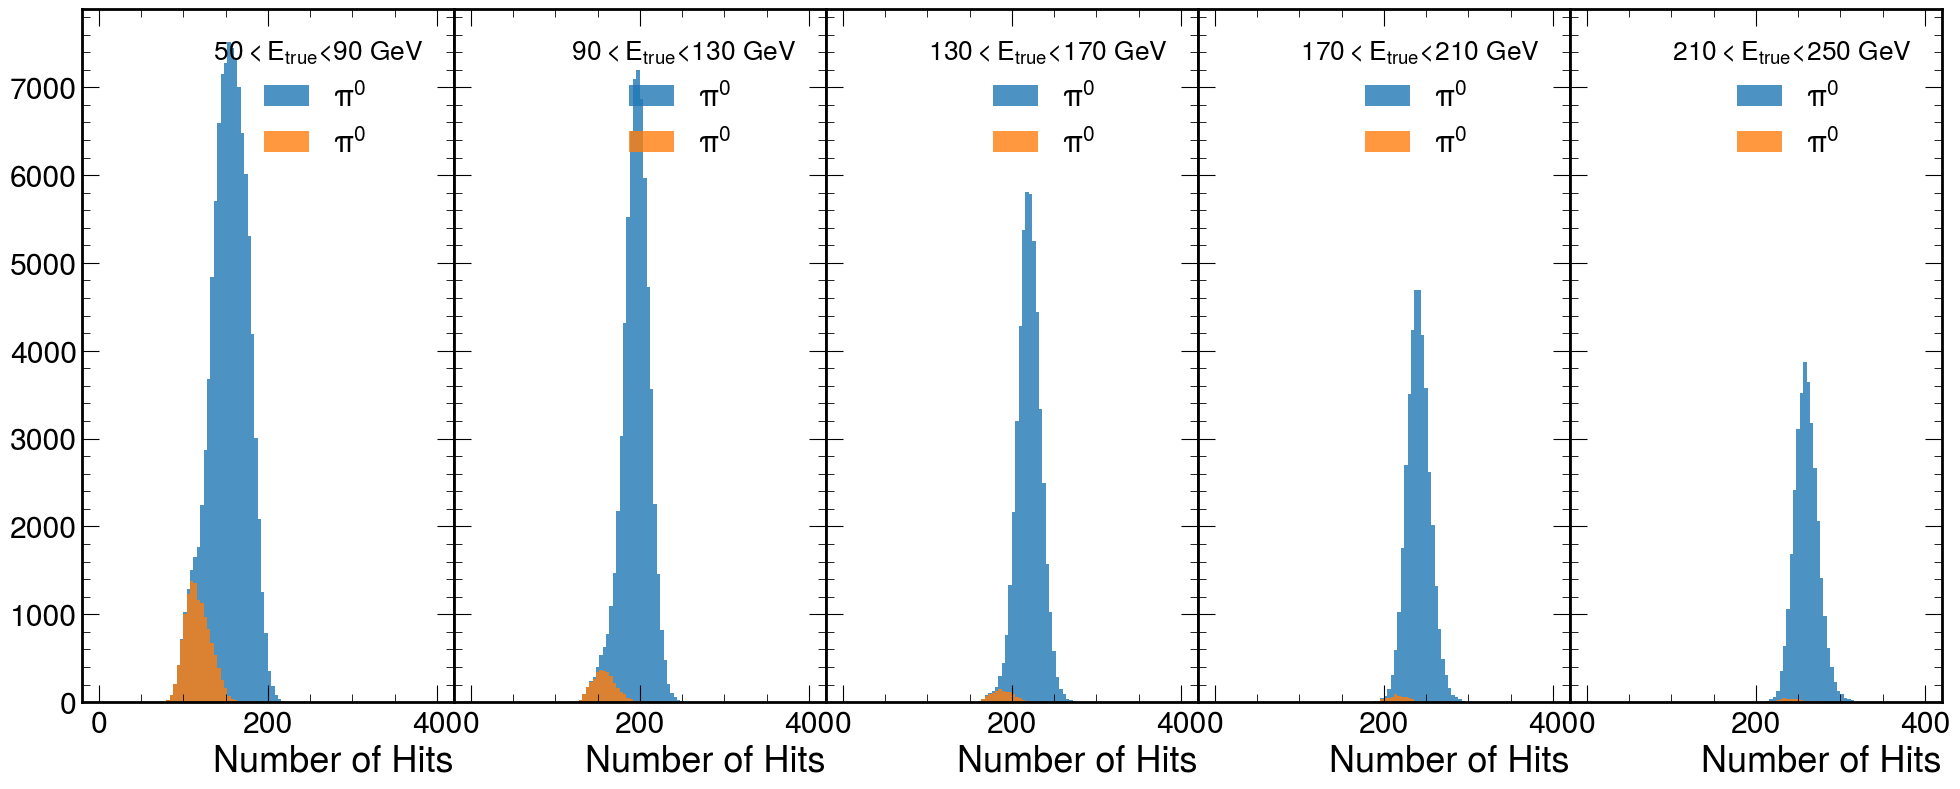

In [14]:
fig, ax = plt.subplots(1,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,5):
    mine = i*40     + 50
    maxe= (i+1)*40   +50

    myrange=(0,400)
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask = mask1 & mask2 & mask3
    ax[i].hist(nhits['pi0'][mask],bins=100,range=myrange,alpha=0.8,label='$\pi^{0}$')

    mask4= mask & (sigma_1['pi0']<sigma_cut)
    ax[i].hist(nhits['pi0'][mask4],bins=100,range=myrange,alpha=0.8,label='$\pi^{0}$')

    
    mytitle = r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe)
    print(mytitle)
    print("Percentage passing cut %2.1f"%(100*len(nhits['pi0'][mask4])/len(nhits['pi0'][mask])))
    ax[i].set_xlabel('Number of Hits')
    ax[i].legend(title=mytitle,loc='best',title_fontsize='19')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

 50$<E_{true}$<90 GeV
Percentage passing cut 33.7
 90$<E_{true}$<130 GeV
Percentage passing cut 8.5
 130$<E_{true}$<170 GeV
Percentage passing cut 3.3
 170$<E_{true}$<210 GeV
Percentage passing cut 1.7
 210$<E_{true}$<250 GeV
Percentage passing cut 0.9


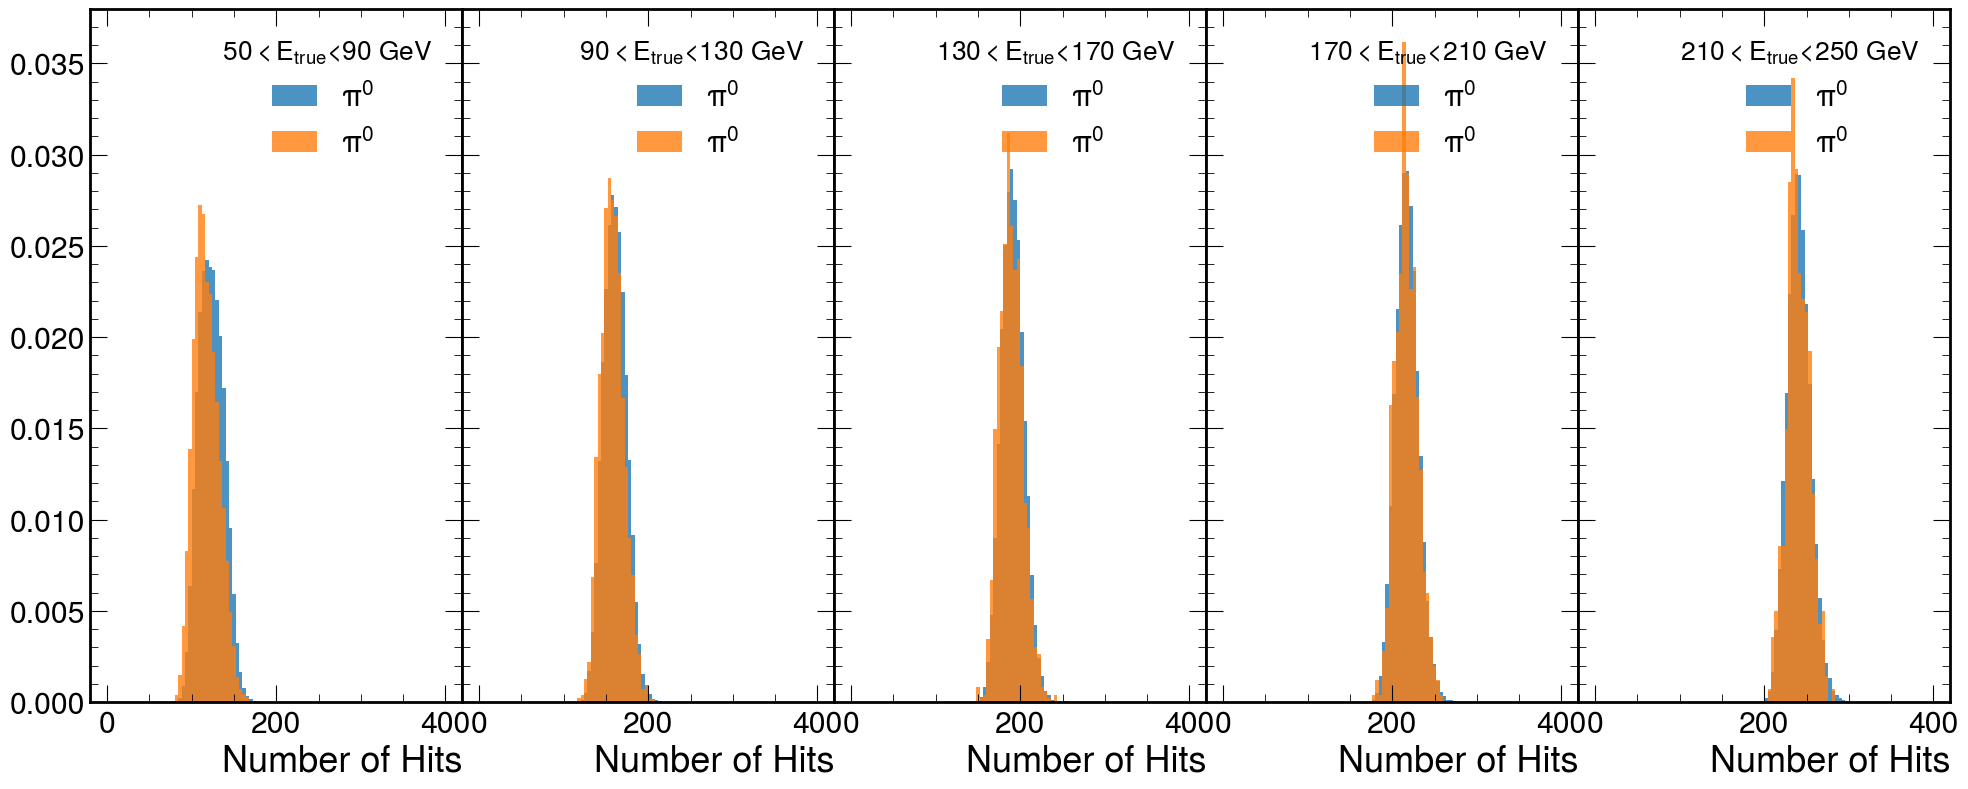

In [41]:
fig, ax = plt.subplots(1,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,5):
    mine = i*40     + 50
    maxe= (i+1)*40   +50

    myrange=(0,400)
    mask1 = true_E['photon']>mine
    mask2 = true_E['photon']<maxe
    mask3 = true_theta['photon']<4
    mask4= mask1 & mask2 & mask3 & (sigma_1['photon']<sigma_cut)


    ax[i].hist(nhits['photon'][mask4],bins=100,range=myrange,density=True,alpha=0.8,label='$\pi^{0}$')

    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask4= mask1 & mask2 & mask3 & (sigma_1['pi0']<sigma_cut)


    ax[i].hist(nhits['pi0'][mask4],bins=100,range=myrange,density=True,alpha=0.8,label='$\pi^{0}$')

    
    
    mytitle = r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe)
    print(mytitle)
    print("Percentage passing cut %2.1f"%(100*len(nhits['photon'][mask4])/len(nhits['photon'][mask])))
    ax[i].set_xlabel('Number of Hits')
    ax[i].legend(title=mytitle,loc='best',title_fontsize='19')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

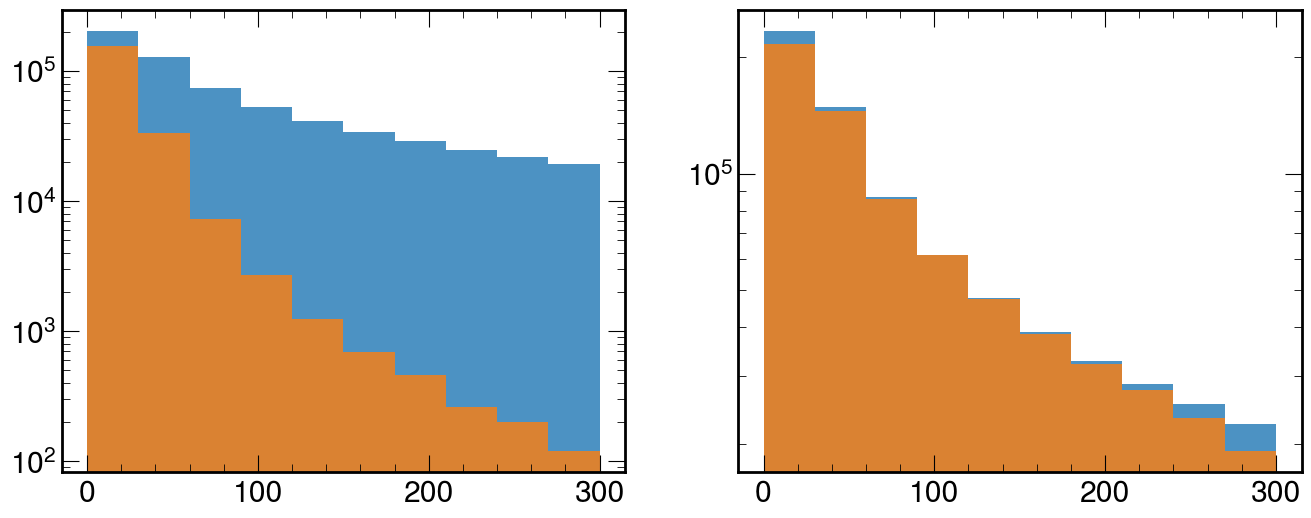

In [15]:
fig, ax = plt.subplots(1,2,figsize=(16,6))



bins = 10
myrange=(0,300)

mask1 = true_E['pi0']>0
mask2 = true_E['pi0']<300
mask3 = true_theta['pi0']<4
mask = mask1 & mask2 & mask3

ax[0].hist(true_E['pi0'][mask],bins=bins,range=myrange,alpha=0.8,label='$\pi^{0}$')

mask4= mask & (sigma_1['pi0']<sigma_cut)
ax[0].hist(true_E['pi0'][mask4],bins=bins,range=myrange,alpha=0.8,label='$\pi^{0}$')

ax[0].set_yscale('log')


mask1 = true_E['photon']>0
mask2 = true_E['photon']<300
mask3 = true_theta['photon']<4
mask = mask1 & mask2 & mask3

ax[1].hist(true_E['photon'][mask],bins=bins,range=myrange,alpha=0.8,label='$\pi^{0}$')

mask4= mask & (sigma_1['photon']<sigma_cut)
ax[1].hist(true_E['photon'][mask4],bins=bins,range=myrange,alpha=0.8,label='$\pi^{0}$')


ax[1].set_yscale('log')

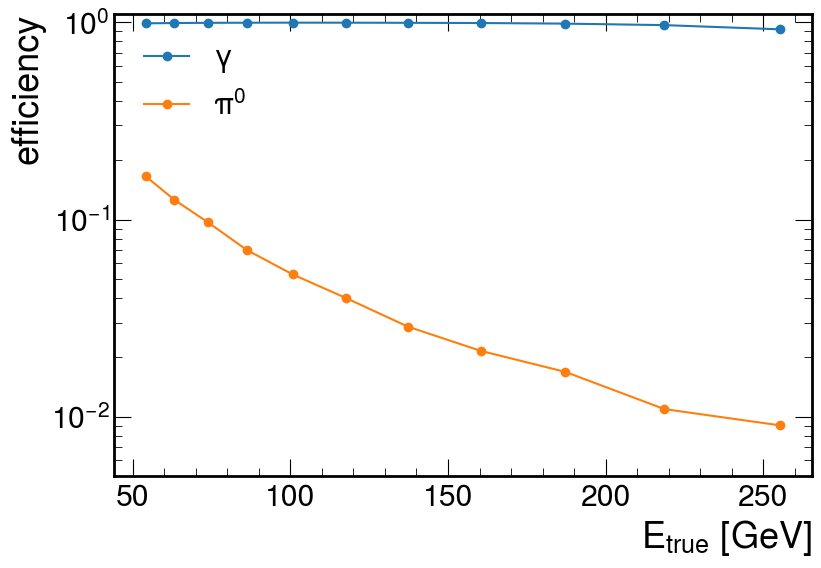

In [35]:

plt.figure(figsize=(9,6))



bins = np.geomspace(50,275,12)


for i,type in enumerate(['photon','pi0']):
    mask1 = true_E[type]>0
    mask2 = true_E[type]<300
    mask3 = true_theta[type]<4
    mask = mask1 & mask2 & mask3
    if type=='photon':
        label = r'$\gamma$' 
    else: 
        label = r'$\pi^{0}$'
    hist2, _ = np.histogram(true_E[type][mask],bins=bins)
    mask4= mask & (sigma_1[type]<sigma_cut)
    hist1,_ = np.histogram(true_E[type][mask4],bins=bins)
    ratio = np.divide(hist1, hist2)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, ratio,'-o',label=label)
    plt.ylim([0.005,1.1])
    plt.yscale('log')
    plt.ylabel('efficiency')
    plt.xlabel(r'$E_{true}$ [GeV]')
    #ax[i].set_xscale('log')
plt.legend(loc='best')

 50$<E_{true}$<90 GeV
Percentage passing cut 11.7
 90$<E_{true}$<130 GeV
Percentage passing cut 4.7
 130$<E_{true}$<170 GeV
Percentage passing cut 2.5
 170$<E_{true}$<210 GeV
Percentage passing cut 1.6
 210$<E_{true}$<250 GeV
Percentage passing cut 1.1


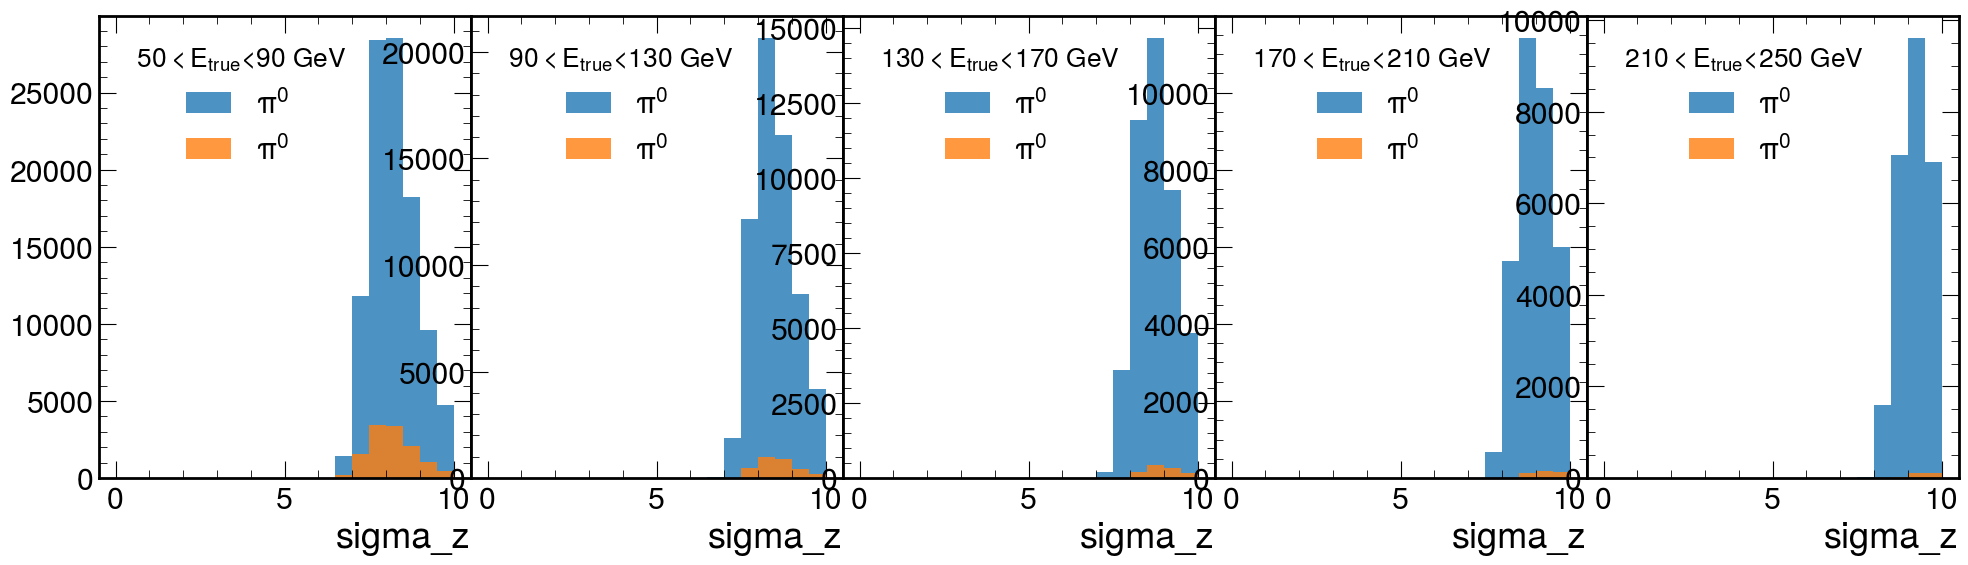

In [20]:
fig, ax = plt.subplots(1,5,figsize=(24,6),sharey=False)
ax = ax.flatten()
for i in range(0,5):
    mine = i*40     + 50
    maxe= (i+1)*40   +50

    myrange=(0,10)
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask = mask1 & mask2 & mask3
    ax[i].hist(sigma_z['pi0'][mask],bins=20,range=myrange,alpha=0.8,label='$\pi^{0}$')

    mask4= mask & (sigma_1['pi0']<sigma_cut)
    ax[i].hist(sigma_z['pi0'][mask4],bins=20,range=myrange,alpha=0.8,label='$\pi^{0}$')

    
    mytitle = r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe)
    print(mytitle)
    print("Percentage passing cut %2.1f"%(100*len(nhits['pi0'][mask4])/len(nhits['pi0'][mask])))
    ax[i].set_xlabel('sigma_z')
    ax[i].legend(title=mytitle,loc='best',title_fontsize='19')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

 50$<E_{true}$<70 GeV
Percentage passing cut 14.3
 70$<E_{true}$<90 GeV
Percentage passing cut 8.3
 90$<E_{true}$<110 GeV
Percentage passing cut 5.4
 110$<E_{true}$<130 GeV
Percentage passing cut 3.8
 130$<E_{true}$<150 GeV
Percentage passing cut 2.8
 150$<E_{true}$<170 GeV
Percentage passing cut 2.2
 170$<E_{true}$<190 GeV
Percentage passing cut 1.7
 190$<E_{true}$<210 GeV
Percentage passing cut 1.5
 210$<E_{true}$<230 GeV
Percentage passing cut 1.1
 230$<E_{true}$<250 GeV
Percentage passing cut 1.0


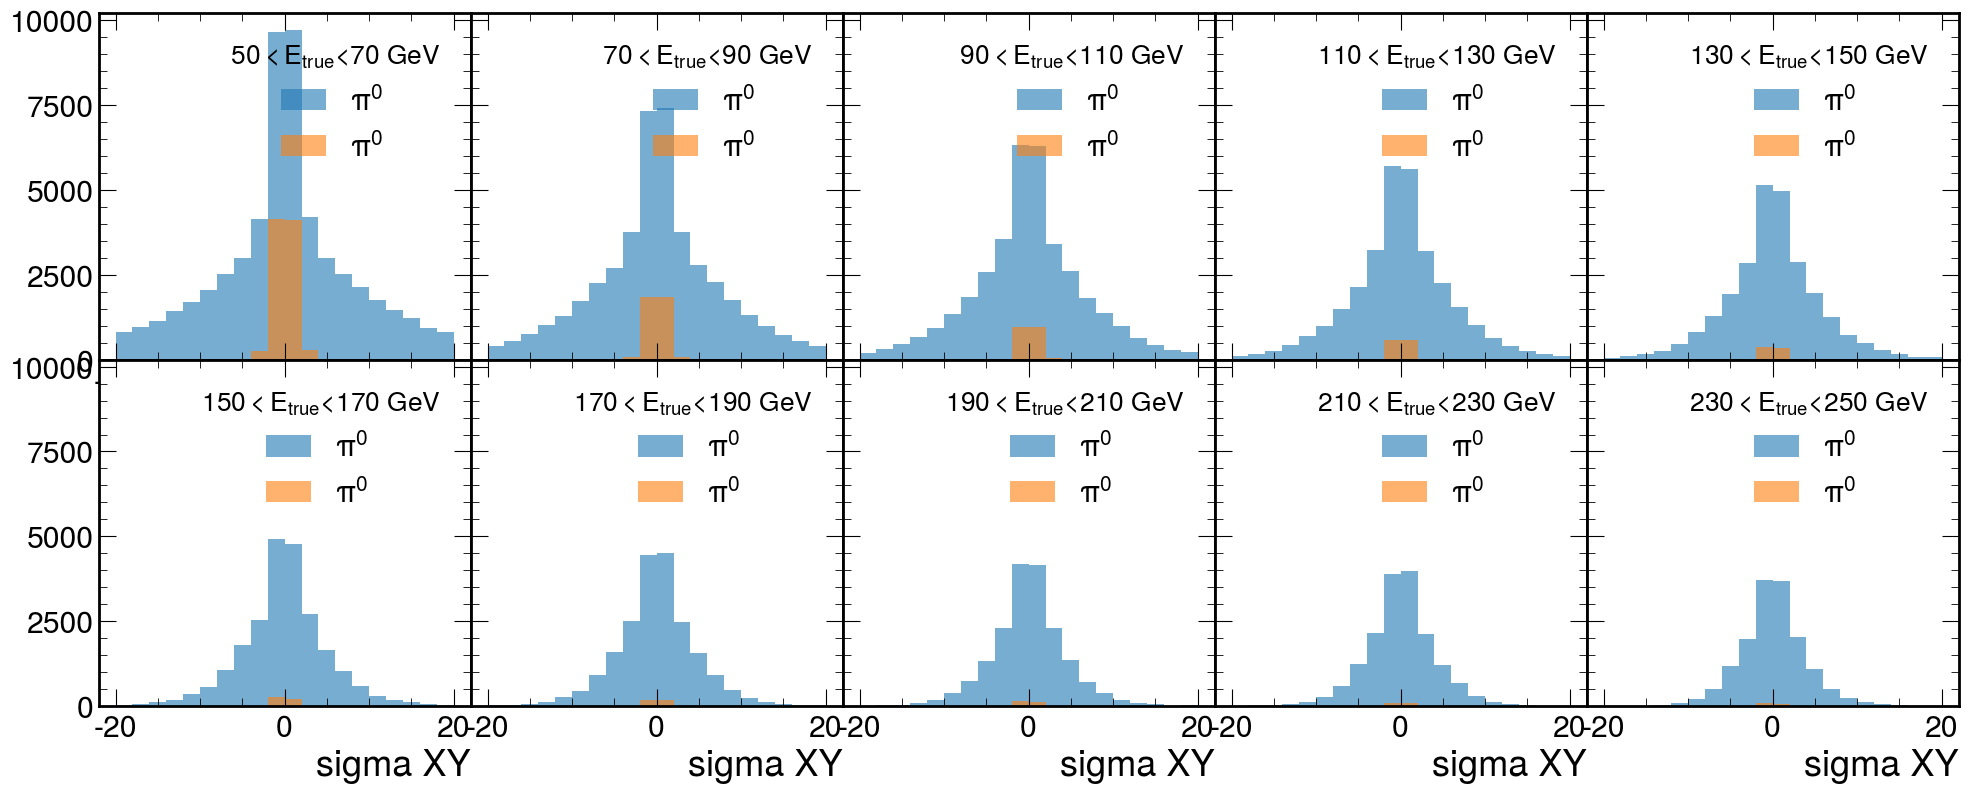

In [18]:
fig, ax = plt.subplots(2,5,figsize=(24,9),sharey=True)
ax = ax.flatten()
for i in range(0,10):
    mine = i*20     + 50
    maxe= (i+1)*20   +50

    myrange=(-20,20)
    mask1 = true_E['pi0']>mine
    mask2 = true_E['pi0']<maxe
    mask3 = true_theta['pi0']<4
    mask = mask1 & mask2 & mask3
    ax[i].hist(sigma_xz['pi0'][mask],bins=20,range=myrange,alpha=0.6,label='$\pi^{0}$')

    mask4= mask & (sigma_1['pi0']<sigma_cut)
    ax[i].hist(sigma_xz['pi0'][mask4],bins=20,range=myrange,alpha=0.6,label='$\pi^{0}$')

    
    mytitle = r' %2.0f$<E_{true}$<%2.0f GeV'%(mine,maxe)
    print(mytitle)
    print("Percentage passing cut %2.1f"%(100*len(nhits['pi0'][mask4])/len(nhits['pi0'][mask])))
    ax[i].set_xlabel('sigma XY')
    ax[i].legend(title=mytitle,loc='best',title_fontsize='19')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()